# PRCP-1001: Rice Leaf Disease Detection

# **Project Introduction:**
Rice is one of the major cultivated crops in India. Rice crops are susceptible to various diseases at various stages of cultivation. Early detection and remedy is required to maintain the best quality and quantity in rice. Farmers with their limited knowledge, have a difficult time identifying these diseases manually. Therefore automated image recognition systems using Convolutional Neural Network (CNN) can be very beneficial in such problems.

# **Classification Problem:**
Our goal is to build a model that would automatically classify rice leaf diseases. For this, we have taken three major attacking diseases in rice plants like leaf blast, bacterial blight and brown spot. We created a model that would determine if the future data inputs will fall in either of these 3 diseases- leaf,blast, bacterial blight and brown spot.

We have deviced the project into multiple steps

• Loading Data

• Preparing Dataset

• Data Preproocessing

• Model Building

• Training

• Check

# **Basic Import**

In [ ]:
import numpy as np
import cv2   #converts image into arrays
import os
import random
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

# **Drive mount**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Keras packages**

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from glob import glob

# **Getting data**

In [ ]:
data = '/content/drive/MyDrive/Colab Notebooks/PRCP-1001-RiceLeaf/Data'
categories=os.listdir(data)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}
['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
[0, 1, 2]


In [ ]:
print("The number of images of bacterial leaf blight:",len(os.listdir('/content/drive/MyDrive/Colab Notebooks/PRCP-1001-RiceLeaf/Data/Bacterial leaf blight')))
print("The number of images of Brown spot:",len(os.listdir('/content/drive/MyDrive/Colab Notebooks/PRCP-1001-RiceLeaf/Data/Brown spot')))
print("The number of images of Leaf smut:",len(os.listdir('/content/drive/MyDrive/Colab Notebooks/PRCP-1001-RiceLeaf/Data/Leaf smut')))

The number of images of bacterial leaf blight: 40
The number of images of Brown spot: 40
The number of images of Leaf smut: 39


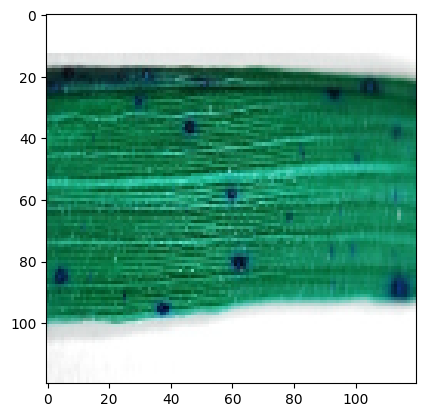

In [ ]:
IMG_SIZE=120
for category in categories:
  folder=os.path.join(data,category)
  for img in os.listdir(folder): #this list dir will list all the files that are present in the folder
       img_path=os.path.join(folder,img)
       img_arr=cv2.imread(img_path)
       img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE)) ##cv2 converts image into array
       plt.imshow(img_arr)

In [ ]:
disease=[]
for category in categories:
  folder=os.path.join(data,category)
  label=categories.index(category)
  for img in os.listdir(folder): #this list dir will list all the files that are present in the folder
       img_path=os.path.join(folder,img)
       img_arr=cv2.imread(img_path)    #cv2 converts image into array
       img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
       disease.append([img_arr,label])

# **Image in array format**

In [ ]:
disease

[[array([[[233, 236, 244],
          [235, 238, 246],
          [233, 237, 243],
          ...,
          [156, 144, 144],
          [158, 150, 150],
          [155, 145, 145]],
  
         [[234, 237, 245],
          [234, 237, 245],
          [233, 234, 245],
          ...,
          [154, 142, 142],
          [152, 142, 142],
          [158, 148, 148]],
  
         [[234, 237, 245],
          [233, 235, 245],
          [233, 235, 245],
          ...,
          [158, 146, 146],
          [158, 148, 148],
          [159, 149, 149]],
  
         ...,
  
         [[234, 238, 243],
          [234, 238, 243],
          [233, 237, 242],
          ...,
          [235, 238, 246],
          [233, 239, 244],
          [235, 239, 244]],
  
         [[236, 239, 245],
          [234, 237, 245],
          [234, 238, 243],
          ...,
          [234, 237, 245],
          [236, 239, 247],
          [234, 237, 244]],
  
         [[236, 240, 245],
          [234, 237, 245],
          [234, 238, 243

# **Defining Features & Class**

In [ ]:
X = []
Y = []
for features, labels in disease:
  X.append(features)
  Y.append(labels)

# **Converting Features img & Class into array**

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X.shape

(119, 120, 120, 3)

# **Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=36)

In [ ]:
X_train.shape

(95, 120, 120, 3)

In [ ]:
X_train[0].shape

(120, 120, 3)

In [ ]:
Y_train.shape

(95,)

# **Creating CNN architecture**

In [ ]:
tf.random.set_seed(32)
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Activation,MaxPooling2D,Dropout,BatchNormalization
from keras.optimizers import SGD
model = Sequential()


model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(120,120,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(120,120,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(120,120,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(100,activation='relu')) # input node
model.add(Dense(100,activation='relu')) # hiddeen
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax')) #output node

# **Model Summary**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 117, 117, 32)   │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 58, 58, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 55, 55, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       460,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 505,703 (1.93 MB)

 Trainable params: 505,703 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

# **Model architecture figure**

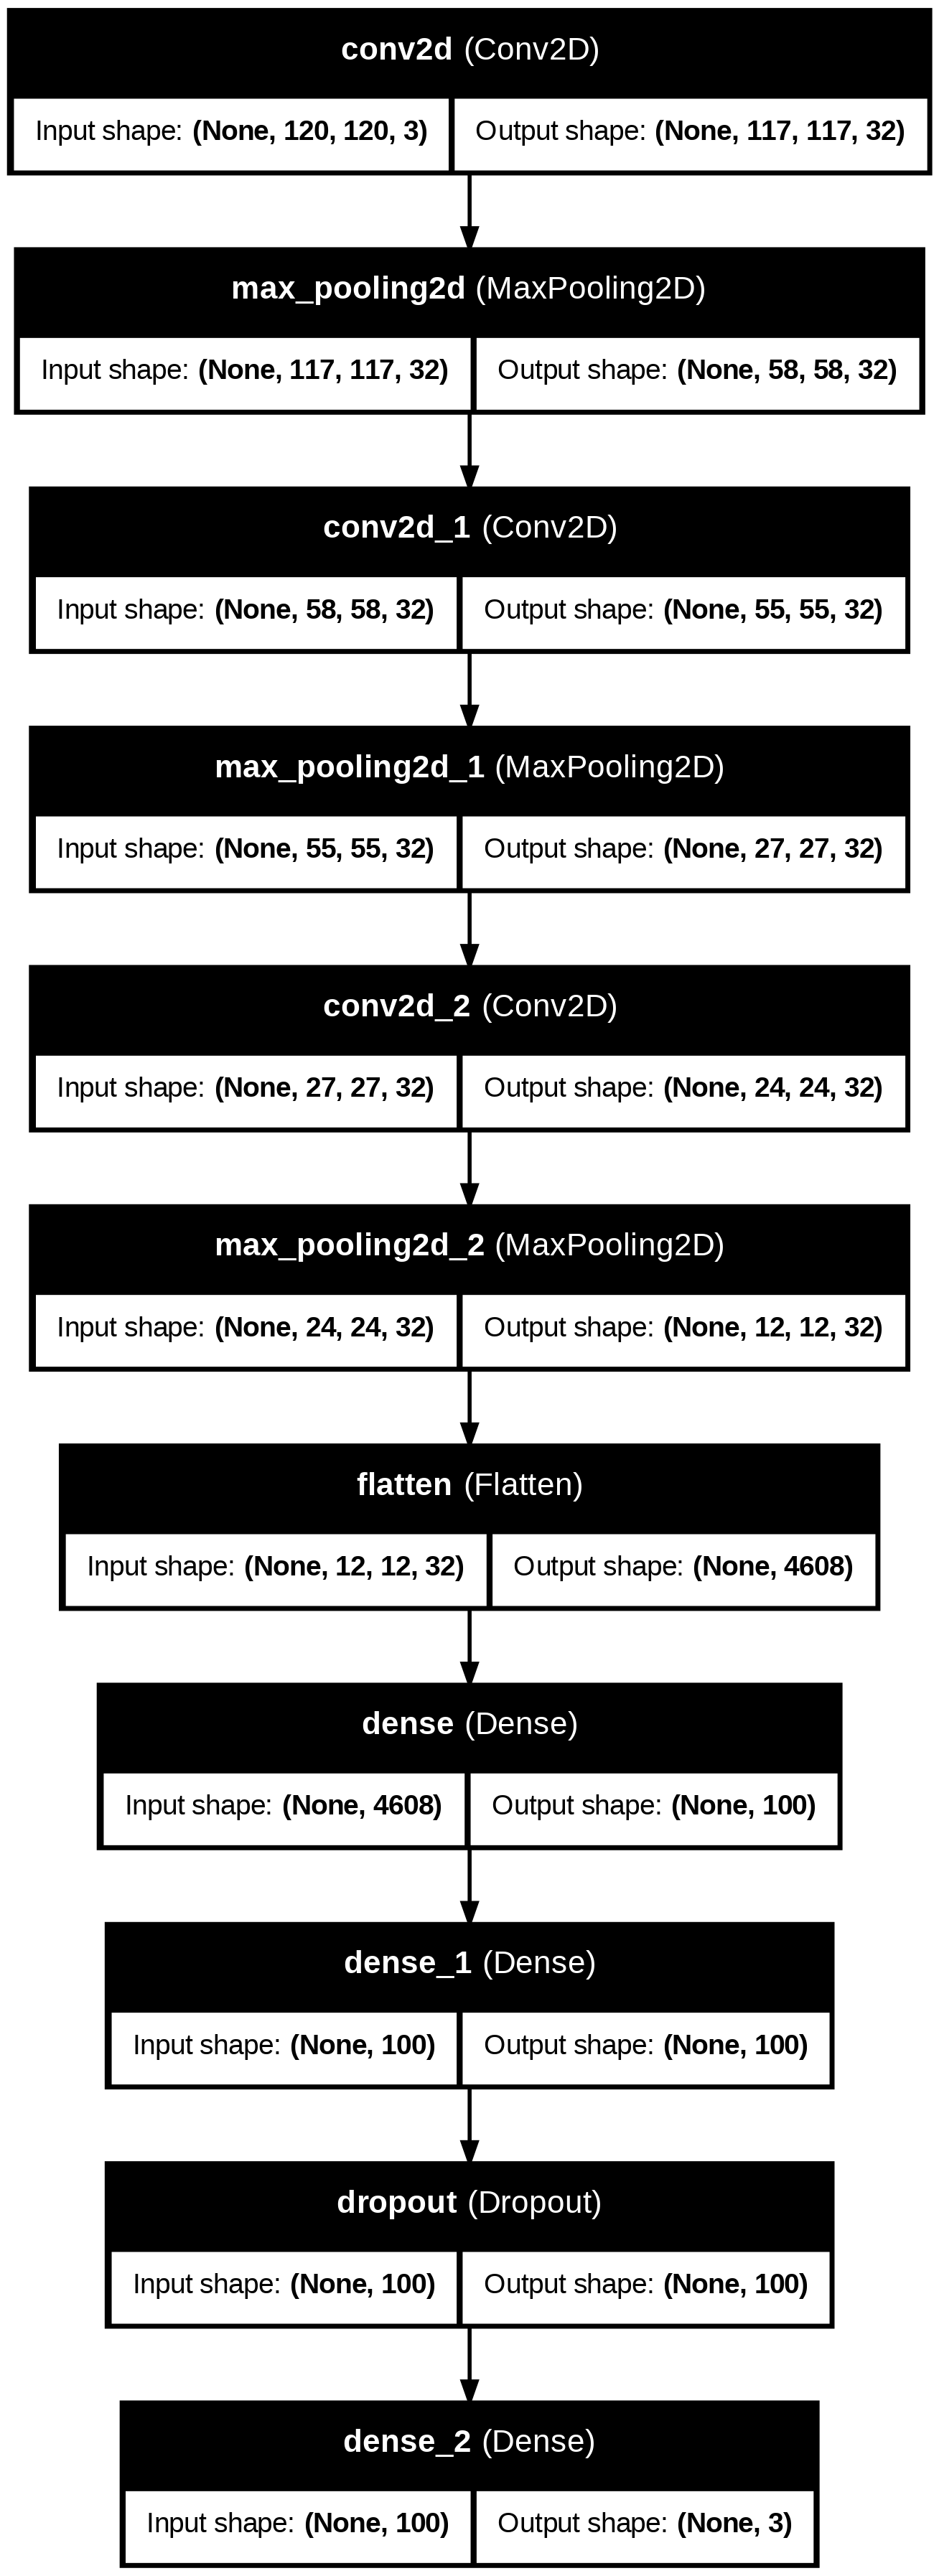

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='simple_cnn.png', show_shapes=True, show_layer_names=True)

# **Optimizers**

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

# **Callback**

In [ ]:
import keras
callback= keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

# **Preprocessing Scale** **images**

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

# **Getting unique class**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train.shape

(95,)

In [ ]:
Y_train[0]

np.int64(1)

In [ ]:
y_categorical_train = to_categorical(Y_train,3)

In [ ]:
y_cat_test = to_categorical(Y_test,3)

**Defining class labels**

In [ ]:
class_labels = ['Bacterial leaf blight','Brown spot','Leaf smut']

# **Plotting Images**

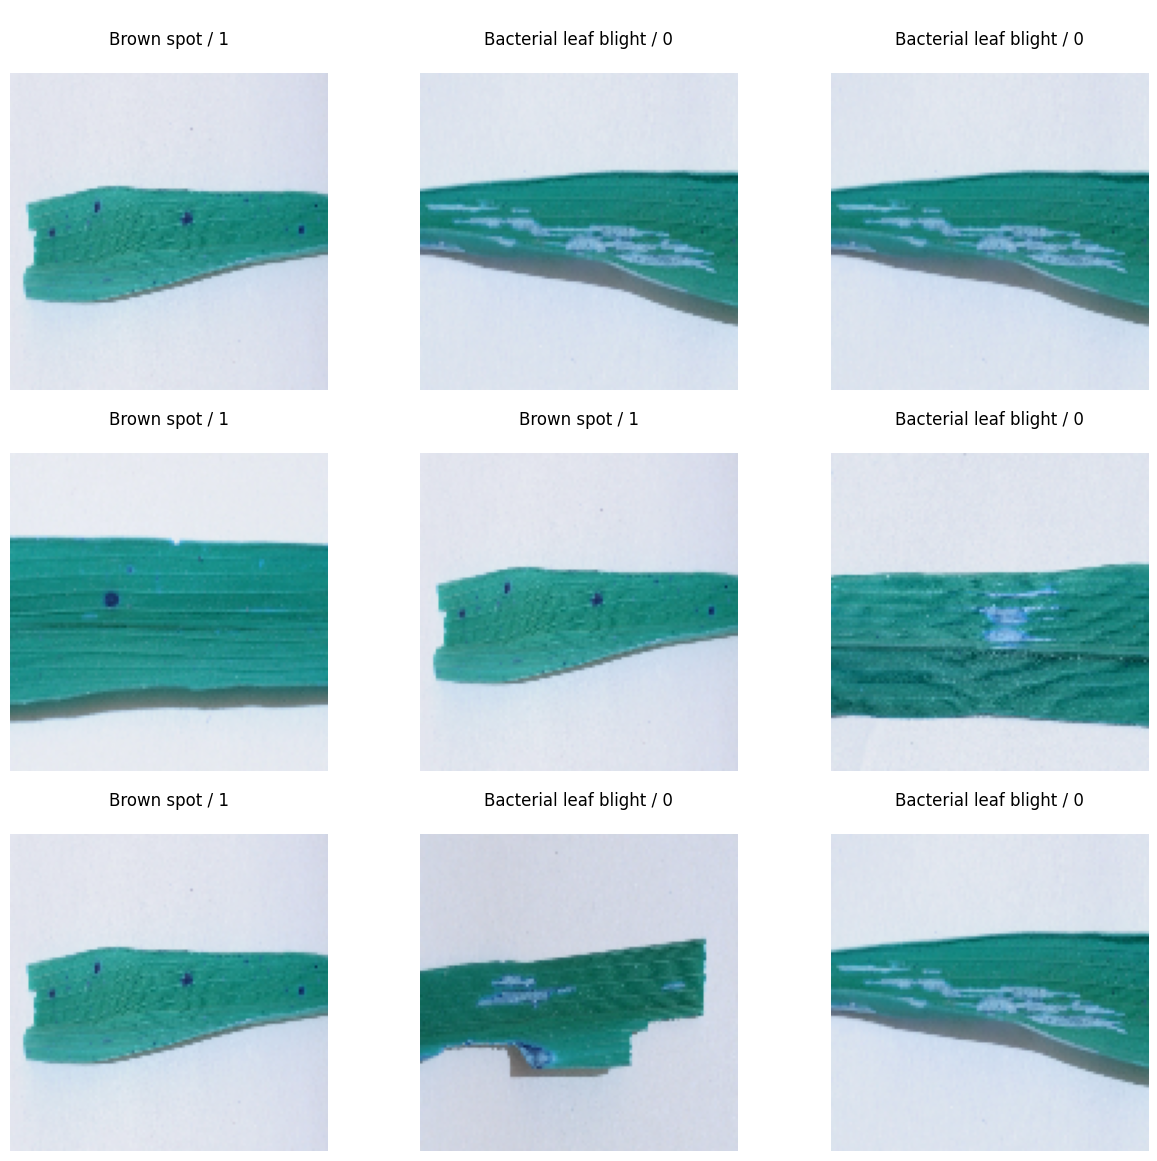

In [ ]:
plt.figure(figsize=(15,14))
j=1
for i in np.random.randint(0,8,9):
  plt.subplot(3,3,j);j+=1
  plt.imshow(X_train_scaled[i])
  plt.axis("off")
  plt.title('\n{} / {}\n'.format(class_labels[np.argmax(y_categorical_train[i])],np.argmax(y_categorical_train[i])))

# **Image Augmentation**

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(X_train_scaled)

# **Model trainning**

In [ ]:
r=model.fit(datagen.flow(X_train_scaled,y_categorical_train, batch_size = 1),
                    steps_per_epoch = int(len(X_train_scaled) / 1), # number of samples per gradient update
                    epochs = 20, # number of iterations
                    validation_data= (X_test_scaled,y_cat_test),
                    callbacks=[callback],
                    verbose=10,shuffle=False)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


# **Loss Plot**

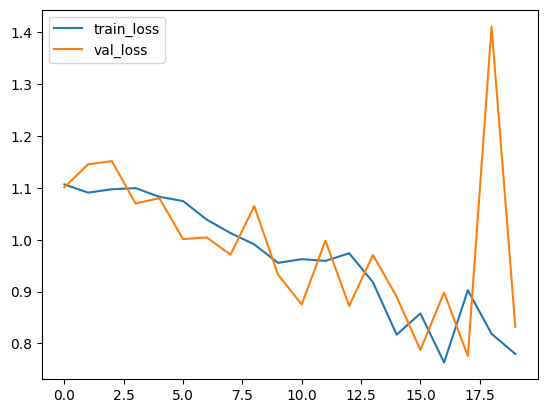

In [ ]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# **Accuracy Plot**

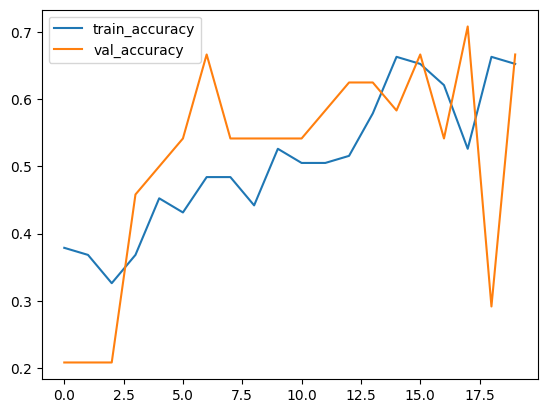

In [ ]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# **Model Evaluation**

In [ ]:
model.evaluate(X_test_scaled,y_cat_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step - accuracy: 0.6667 - loss: 0.8319


[0.8319053053855896, 0.6666666865348816]

# **Classification report**

In [ ]:
from sklearn.metrics import classification_report
predictions = np.argmax(model.predict(X_test_scaled), axis=-1)
print(classification_report(Y_test,predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step
              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       1.00      0.42      0.59        12
           2       0.67      0.80      0.73         5

    accuracy                           0.67        24
   macro avg       0.74      0.74      0.67        24
weighted avg       0.80      0.67      0.65        24



In [ ]:
print(f"Predicted Class : {predictions}\n")
print(f"Test Images Class : {Y_test}")

Predicted Class : [2 1 0 1 2 0 1 0 1 0 1 2 0 0 0 0 2 2 0 0 2 0 0 0]

Test Images Class : [2 1 1 1 2 0 1 0 1 1 1 2 1 1 0 0 2 1 1 0 1 0 2 0]


In [ ]:
#model.save('riceleaf_disease_prediction')

In [ ]:
from keras.models import load_model
#model3 = load_model('riceleaf_79')

# **Confusion Matrix**

<Figure size 640x480 with 0 Axes>

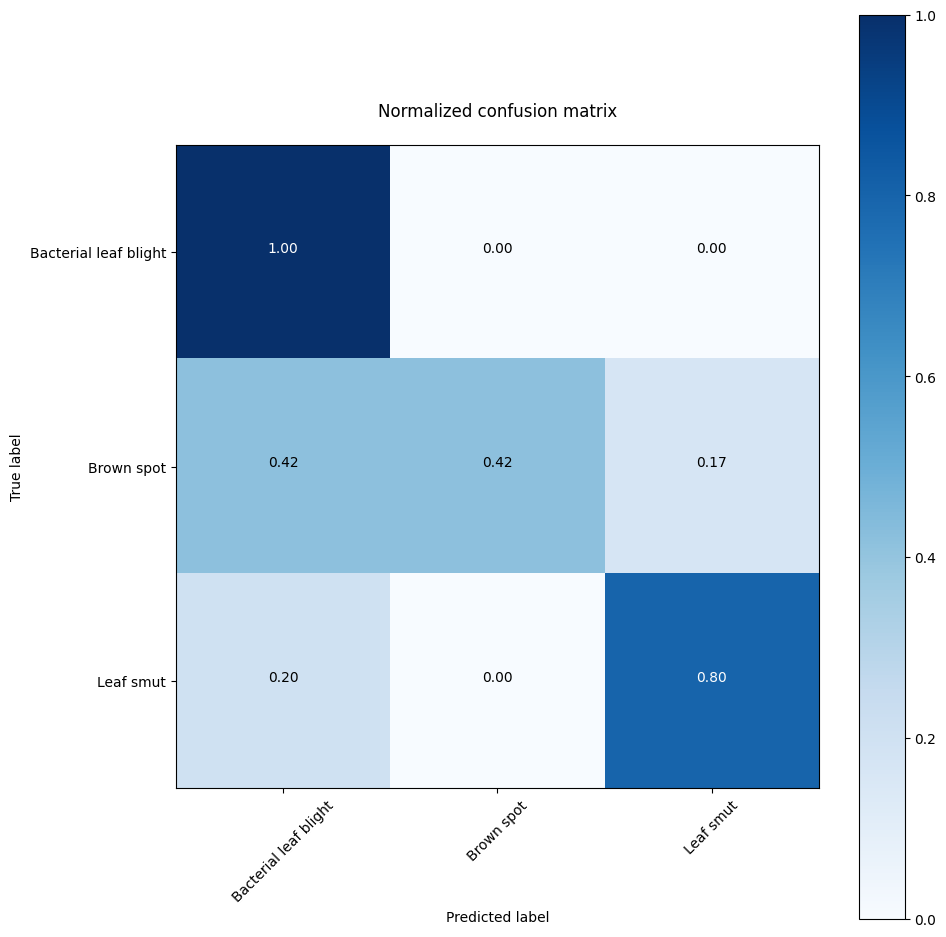

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, predictions)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, title='Normalized confusion matrix\n')
plt.show()

# **Conclusion**
Based on the given objectives the dataset has been analysed,the model has been built and the results have been predicted with the test data.The CNN Machine learning model has been fitted and predicted with high accuracy.Also, we observed that by adjusting the training parameters like learning rate, number of epochs, and optimizer methods, we can get significant accuracy with a handmade model having less number of layers than the other traditional models. The better we can detect infections, the simpler it will be for farmers to protect their crops. In the future, we will broaden the scope to include more diseases and algorithms, making disease detection vast, easier and faster.